<font size="6"><b>Statistical Thinking: Monte Carlo Simulation</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 70% style="border-style: hidden; border-collapse: collapse;">
        </td>
        <td width = 26%>
By Seungchul Lee<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>    
</table>


Table of Contents
<div id="toc"></div>

## 1.1. Example: Probability of having head with a fair coin

Head 1 and Tail 0

In [2]:
import numpy as np
import matplotlib.pylab as plt

numTrial = 100
numH = 0

for i in range(numTrial):
    flip = np.random.choice([0,1])
    if flip == 1:
        numH += 1
    
float(numH)/numTrial        
            

0.45

## 1.2. Example: the expected number of trials upto the first hitting H

$$\text{coin}
\begin{cases}
  H : \frac{1}{2}\\
  T : \frac{1}{2}
\end{cases}
$$

Question: the expected number of trials upto the first hitting H ?

$$\begin{align*}
1 \quad & H & \frac{1}{2}\\
2 \quad & TH & \frac{1}{2} \frac{1}{2}\\
3 \quad & TTH & \frac{1}{2} \frac{1}{2} \frac{1}{2}\\
& \vdots & 
\end{align*}
\quad \quad \quad  \sum\limits_{n=1}^{\infty}n\left(\frac{1}{2}\right)^n
$$

In [1]:
val = 0 
for n in range(20):
    val = val + n*(1./2.)**n

print (val)

1.99995994568


In [4]:
numTrial = 1000
nums = [];

for k in range(numTrial):
    num = 1
    while np.random.choice([0,1]) != 0:
        num = num + 1
    nums = nums + [num]

print np.mean(nums)

1.97


__Remark:__

how to compute $\sum\limits_{n=1}^{\infty}n\left(\frac{1}{2}\right)^n = 1\frac{1}{2}+2\left(\frac{1}{2}\right)^2+3\left(\frac{1}{2}\right)^3+\cdots$

$$\begin{align*}
\frac{d}{dx}\sum\limits_{n=1}^{\infty}\left(1-x\right)^{n+1} &= \frac{d}{dx}\frac{(1-x)^2}{1-(1-x)} = \frac{d}{dx}\frac{(1-x)^2}{x}\\
\sum\limits_{n=1}^{\infty}(n+1)(1-x)^n &= \sum\limits_{n=1}^{\infty}n(1-x)^n + \sum\limits_{n=1}^{\infty}(1-x)^n\\
& = \frac{(1-x)^2 + 2(1-x)x}{x^2}
\end{align*}$$

$$\begin{align*}
x = \frac{1}{2} &\implies \sum\limits_{n=1}^{\infty}n\left( \frac{1}{2} \right)^n + \frac{1-\frac{1}{2}}{\frac{1}{2}}= \frac{\frac{1}{4} + 2 \cdot \frac{1}{2} \cdot \frac{1}{2}}{\frac{1}{4}}\\
&\implies \sum\limits_{n=1}^{\infty} n\left(\frac{1}{2}\right)^n =2
\end{align*}$$

or

$$\begin{align*}
y &= 1\frac{1}{2} + 2\left( \frac{1}{2} \right)^2 + 3\left(\frac{1}{2} \right)^3 + \cdots&\\
2y &= 1 + 2\left( \frac{1}{2}\right) + 3\left( \frac{1}{2} \right)^2 + \cdots&\\
\implies y &= 1 + \left(\frac{1}{2}\right) + \left( \frac{1}{2} \right)^2 + \cdots &= \frac{1}{1 - \frac{1}{2}} = 2 
\end{align*}$$


## 1.3. Example: Integration

$$
\int_{0}^{1} x^2dx = \frac{1}{2}x^3\bigg|^1_0 = \frac{1}{3}$$

Question : how to solve integration with computers ?


<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src = "./image_files/st01.png", width = 400>
        </td>
        <td width = 48%>        
            $$
            \begin{align*}
            \Delta A &= f(x) \Delta x \\ \\
            A \approx \sum \Delta A &= \sum f(x_k)\Delta x
            \end{align*}
            $$
        </td>
    </tr>
</table>

In [4]:
#by summing up

dx = 0.001
x = np.arange(0,1,dx)
area = 0
for i in range(len(x)):
    area = area + x[i]**2*(dx)

print (area)

0.3328335


In [5]:
# shortened version
np.sum(x**2)*dx

0.3328335

In [6]:
#shortened version
x.dot(x.T)*dx

0.3328335

Question: another method ? (use randomness)

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            $$\begin{array}{Icl}\begin{align*}
            x = \text{rand}(n,1)\\
            y = \text{rand}(n,1)
            \end{align*}&
            \implies&
            \text{plot}(x,y)
            \end{array}$$
        </td>
        <td width = 48%>
            <img src = "./image_files/st02.png", width = 250>
        </td>
    </tr>
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src = "./image_files/st03.png", width = 250>
        </td>
        <td width = 48%>
            $$\frac{\text{# under }y=x^2}{\text{# total}}$$
        </td>
    </tr>
    <tr>
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src = "./image_files/st04.png", width = 250>
        </td>
        <td width = 48%>
            $$\frac{\text{area under }y=x^2 }{\text{total area}}$$
        </td>
    </tr>
</table>

It is known as __Monte Carlo simulation__

$\implies$ extremely powerful

$\implies$ can apply to many, many, many (enginerring) problems

In [11]:
# the number of points below curve out of the total number is a fraction of area

n = 10000

# generate n random numbers x and y

# create 1D array with n uniformly distribured random numbers

x = np.random.rand(n,1)
y = np.random.rand(n,1)

count = 0.
for i in range(n):
    # compute y to f(x)
    if y[i] < x[i]*x[i]:
        count = count + 1

area = count/n

print (area)

0.3273


In [16]:
# shortened version

area = np.sum(y < x**2)/float(n)
print (area)

0.3273


## 1.4. Example: compute $\pi$ statistically

In [4]:
from __future__ import division

n = 5000
x = np.random.rand(n)
y = np.random.rand(n)

IN = []
OUT = []
count = 0

for i in range(n):
    if np.sqrt(x[i]**2 + y[i]**2) < 1:
        count += 1
        IN = IN + [i]
    else:
        OUT = OUT + [i]

        
count/n*4        

3.1504

(0.0, 1.0, 0.0, 1.0)

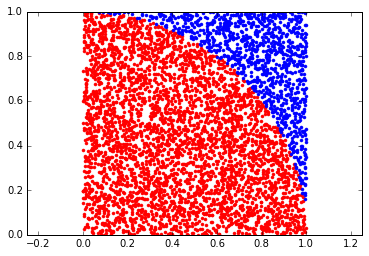

In [5]:
%matplotlib inline

plt.plot(x[IN],y[IN],'r.')
plt.plot(x[OUT],y[OUT],'b.')
plt.axis('equal')

In [7]:
# shortened version

np.sum(np.abs(x + 1j*y) < 1)/n*4

3.1112000000000002

## 1.5 Monty Hall Problem
- from Introduction to Computer Science and Programming at MIT 2011

In [1]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/HH-676dOCFs" 
frameborder="0" allowfullscreen></iframe>

In [8]:
N = 1000
win = 0

for i in range(N):
    door_car = np.random.choice([1,2,3])
    door_pick = np.random.choice([1,2,3])
    
    if door_car == door_pick:
        win += 1

win/N        

0.321

In [9]:
win = 0

for i in range(N):
    door_car = [np.random.choice([1,2,3])]
    door_pick = [np.random.choice([1,2,3])]
    doors_goats = [item for item in [1,2,3] if item not in door_car]
    
    if door_car == door_pick:
        door_show = [np.random.choice(doors_goats)]
    else:
        door_show = [item for item in doors_goats if item not in door_pick]
        
    # do switch    
    door_switch = [item for item in [1,2,3] if item not in (door_pick + door_show)]
    if door_car == door_switch:
        win += 1

win/N        
    

0.67

## 1.6 Random Walk

- We can statistically simulate nature
- Random walk is one of the famous example

In mathematical expression in 1D

$$\begin{align*}
x_i &\in \{-1, 1\} \quad \text{ Randomly selected}\\
x_n &= x_1 + x_2 + \cdots + x_n = \sum\limits_{i=1}^{n}x_i
\end{align*}$$

example 1D) 

| | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- | --- |
|$x_i$| -1 | -1 | 1 | -1 | 1 | 1 |
|$s_i$| -1 | -2 | -1 | -2 | -1 | 0 |

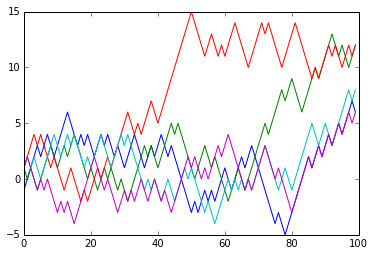

In [10]:
N = 100

for i in range(5):
    s = np.cumsum(np.random.choice([-1,1],N))
    plt.plot(s)

### Random walk in 2D

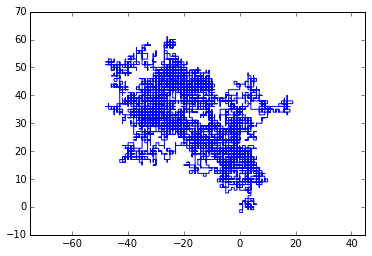

In [11]:
N = 10000
direction = [[1,0],[-1,0],[0,1],[0,-1]]

directions = []

for i in range(N):
    directions = directions + direction[np.random.choice([0,1,2,3])]
    
directions = np.array(directions)    
directions = directions.reshape(N,2)

x = np.cumsum(directions[:,0])
y = np.cumsum(directions[:,1])

plt.plot(x,y)
plt.axis('equal')
plt.show()

### Random walk in 3D

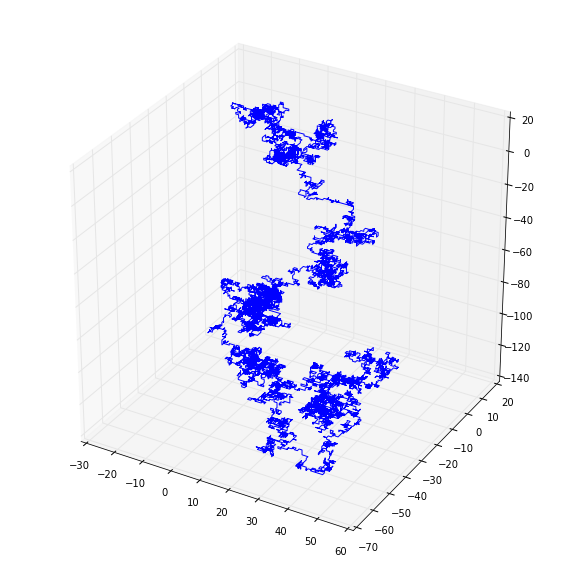

In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

N = 10000
direction = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]

directions = []

for i in range(N):
    directions = directions + direction[np.random.choice([0,1,2,3,4,5])]
    
directions = np.array(directions)    
directions = directions.reshape(N,3)

x = np.cumsum(directions[:,0])
y = np.cumsum(directions[:,1])
z = np.cumsum(directions[:,2])

fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

ax.plot(x,y,z)
ax.axis('equal')
plt.show()

## A program to draw fabric flowing like a river
- Before we get started, here’s another toy project for you to fool around with. As before, you can fiddle with the numbers freely to see what kinds of pictures you can make. This one uses random numbers, so each time you run it you’ll get a different picture
- run with processing IDE 

``` java
%%processing
float NoiseScale = 0.0001;
float NoiseOffsetX, NoiseOffsetY;

void setup() {
  size(800, 600, P2D);
  background(255);
  smooth();
  noFill();
  stroke(0, 0, 0, 32);
  
  for (int i=0; i<300; i++) {
    NoiseOffsetX += 5;
    NoiseOffsetY += 7.1;
    drawOneStream();
  }
}

void drawOneStream() {
  float px = 0;
  float py = height/2.0;
  float vx = 1;
  float vy = 0;
  int pcnt = 0;
  
  while ( (px>=0) && (px<width) && (py<height) && (py>=0)) {
    point(px, py);
    float xNoise = noise((pcnt+NoiseOffsetX) * NoiseScale);
    float yNoise = noise((pcnt+NoiseOffsetY) * NoiseScale);
    vx = ((2*vx) + 1 + map(xNoise, 0, 1, -1, 1))/4.0;
    vy = ((3*vy) + map(yNoise, 0, 1, -1, 1))/4.0;
    px += vx;
    py += vy;
    pcnt++;
  }
}
```

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>